In [3]:
from cnn_fully_connected_test import *


In [5]:
train_file = 'datasets/train.csv'
test_file = 'datasets/test.csv'

X_test = loadtxt(test_file, usecols=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10), unpack=True, delimiter=',').T
Y_test = loadtxt(test_file, unpack=True, usecols=(11), delimiter=',')

X = loadtxt(train_file, usecols=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10), unpack=True, delimiter=',').T
Y = loadtxt(train_file, unpack=True, usecols=(11), delimiter=',')

print('Data loaded!')

Data loaded!


In [7]:
model = create_baseline_model()
hist = model.fit(X, Y, validation_data=(X_test, Y_test), epochs=5)
preds = model.predict(X_test)

Train on 436275 samples, validate on 435435 samples
Epoch 1/5
436275/436275 [==============================] - 47s 108us/step - loss: 0.0106 - mean_squared_error: 0.0106 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 59.4378 - cosine_proximity: -0.9466 - val_loss: 0.0120 - val_mean_squared_error: 0.0120 - val_mean_absolute_error: 0.0700 - val_mean_absolute_percentage_error: 69.9835 - val_cosine_proximity: -0.9637
Epoch 2/5
436275/436275 [==============================] - 41s 95us/step - loss: 0.0031 - mean_squared_error: 0.0031 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 38.0547 - cosine_proximity: -0.9845 - val_loss: 0.0144 - val_mean_squared_error: 0.0144 - val_mean_absolute_error: 0.0745 - val_mean_absolute_percentage_error: 74.4772 - val_cosine_proximity: -0.9936
Epoch 3/5
436275/436275 [==============================] - 44s 101us/step - loss: 0.0018 - mean_squared_error: 0.0018 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 33.

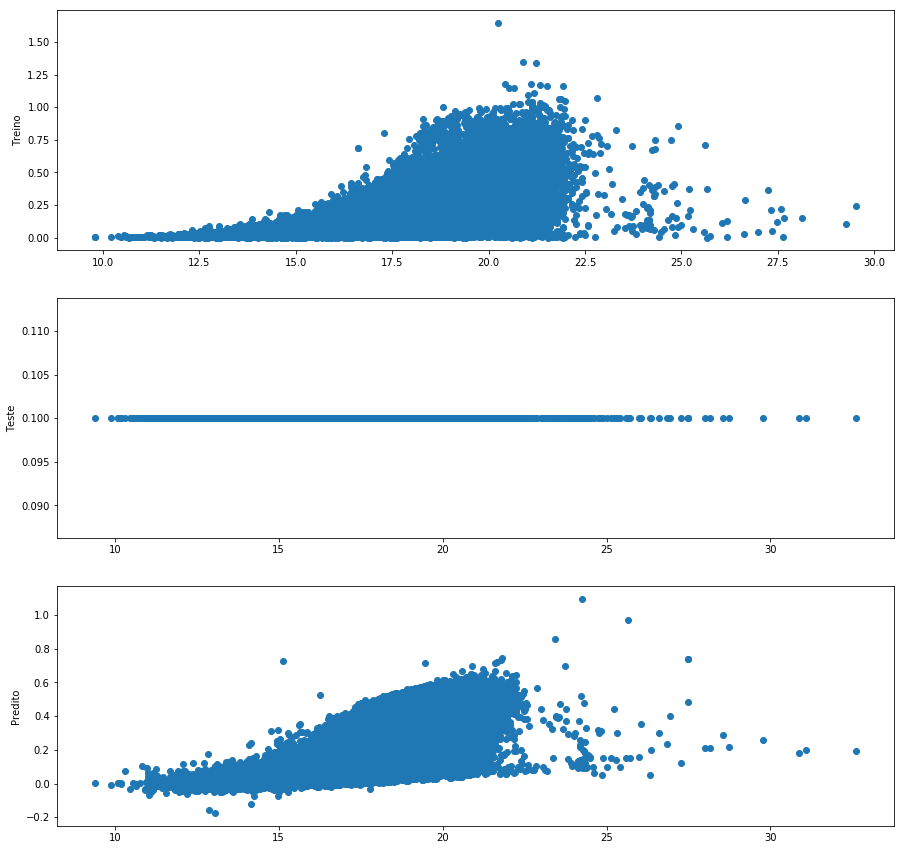

In [8]:
plot_scatter(X, Y, X_test, Y_test, preds)

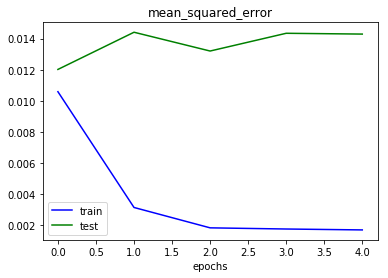

In [9]:
plot(hist.history, 'mean_squared_error')

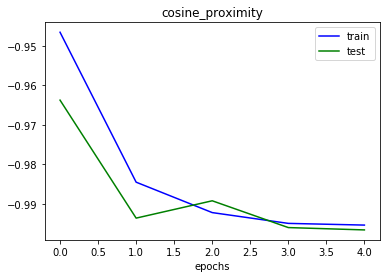

In [10]:
plot(hist.history, 'cosine_proximity')